In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from scipy.optimize import curve_fit
from imageio import imread
import glob

# Para regresar a la carpeta
os.chdir('C:/Users/JAAL_/Documents/Sincronizar_Drive/Tesis/codigos-jupyter/Magnetometria-NV/')

In [2]:
def dividir_matriz_en_submatrices(matriz, m):
    n1 = matriz.shape[0]
    n2 = matriz.shape[1]
    if n1 % m != 0 or n2 % m:
        print(f"dimensión filas de la matriz {n1}")
        print(f"dimensión columna de la matriz {n2}")
        print(f"dimensión de la submatriz {m}")
        raise ValueError("El tamaño de la matriz no es divisible por el tamaño de las submatrices.")
    
    # Crear una lista de submatrices
    submatrices = []
    
    for i in range(0, n1, m):
        fila_submatrices = []
        for j in range(0, n2, m):
            submatriz = matriz[i:i+m, j:j+m]
            fila_submatrices.append(submatriz)
        submatrices.append(fila_submatrices)
    
    return np.array(submatrices)

##### Ejemplo de uso
n = 4  # tamaño de la matriz
m = 2 # tamaño de las submatrices
matriz = np.arange(n*n).reshape(n, n)

print("Matriz original:")
display(matriz)

submatrices = dividir_matriz_en_submatrices(matriz, m)

print("\nSubmatrices:")
submatrices

Matriz original:


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])


Submatrices:


array([[[[ 0,  1],
         [ 4,  5]],

        [[ 2,  3],
         [ 6,  7]]],


       [[[ 8,  9],
         [12, 13]],

        [[10, 11],
         [14, 15]]]])

# Cargando la data obtenida del experimento para ODMR sin campo

C:\Users\JAAL_\AppData\Local\Temp\ipykernel_21832\2302421751.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ndim = np.array(imread(file[0][0])).shape[0] # dimensión de la matriz total
C:\Users\JAAL_\AppData\Local\Temp\ipykernel_21832\2302421751.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag = np.array(imread(file[i][j]))


( # experimento_i, frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)


(64, 31, 5, 5, 8, 8)

( frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)


(31, 5, 5, 8, 8)

( frecuencia_j, submatriz_k, submatriz_l)


(31, 5, 5)

(frecuencia, submatriz_k, submatriz_l)


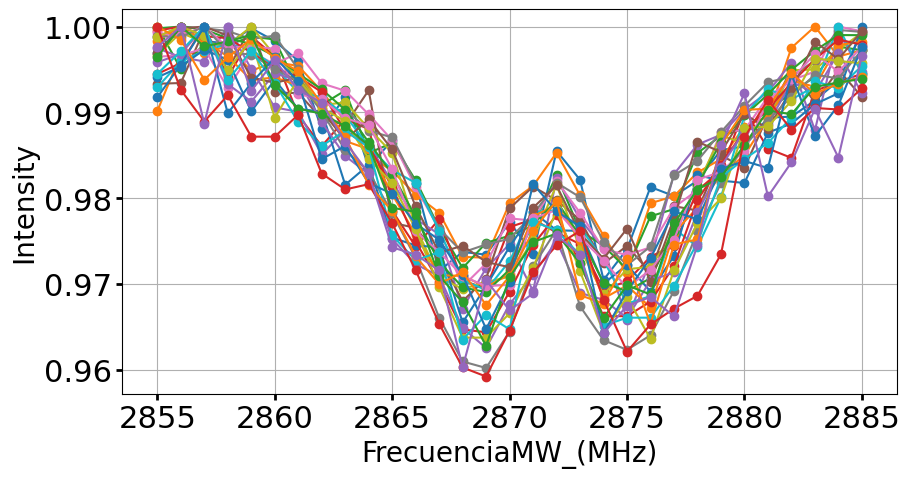

In [3]:
''' ########### Datos de imagenes a array con las submatrices ##############   ''' 

os.chdir('C:/Users/JAAL_/Documents/ODMR-jupyter-calculo-magnetometria/Datos-para-magnetometria/odmrsc-corte')
# ahora si se ubica en la carpeta una

########################## LECTURA ################################

# numero de medias 
nmedias = 64
file = list()
for i in range(1,nmedias+1):
    # devuelve la ruta especificada de datos
    file.append(glob.glob(str(i)+'_image_*.png'))

######################## FRECUENCIAS ###############################
    
my_range=np.arange(2870-15,2870+16,1)
f1 = [x for x in my_range] # El rango de frecuencias de las fotos en una lista

####################### Preparamos el array ODMR1 ##########################
'''
i = En el for indica el numero de experimento 
j = Indica el numero de frecuencia en la foto
'''

ODMR = [] # La lista supergrande  
ndim = np.array(imread(file[0][0])).shape[0] # dimensión de la matriz total
m = 8 # m es la subdivisión de matrices cuadradas
for i in range(nmedias):
    n = []
    for j in range(len(f1)):
        imag = np.array(imread(file[i][j]))
        
        # Convertimos la matriz en submatrices 
        submatriz_imag = dividir_matriz_en_submatrices(imag, m)
        n.append(submatriz_imag)
        
    ODMR.append(np.array(n)) # Es importante que ''n'' lo transformemos en array

ODMR1 = np.array(ODMR) # Es importante transformarlo a array

print("( # experimento_i, frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)")
display(ODMR1.shape)

'''
#########3 Sumar en indices para evidenciar las contrastar las variaciones del ODMR #####################

- Se suma todos los experimentos, para eso el array ODMR1 se suma un primer indice
- Suerte tengo que con array es una tarea sencilla porque los indices son ejes en un array y se puede sumar en numpy es con np.sum() 
- Con el resultado final ya no es necesario hacer más calculo, solo escoge la submatriz y a trabajar sobre lo que necesitas
'''

# Sumar en eje 0
ODMR2 = np.sum(ODMR1, axis=0)
print("( frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)")
display(ODMR2.shape)

# Sumar 2 ejes 
print("( frecuencia_j, submatriz_k, submatriz_l)")
ODMR3 = np.sum(ODMR2, axis=(3,4))
display(ODMR3.shape)

print("(frecuencia, submatriz_k, submatriz_l)")


'''
################ Escogiendo la submatriz de trabajo #########################
'''

plt.figure(figsize = (10,5))

for k in range(0,int(ndim/m)):
    for l in range(0,int(ndim/m)):
        ODMR_ROI = ODMR3[:,k,l]/np.amax(ODMR3[:,k,l]) # normalizamos
        ODMR_ROI
        plt.plot(f1,ODMR_ROI,'-o',label=f"{k},{l}")
        
plt.tick_params(direction='out', length=4, width=2, colors='black',labelsize=22)       
plt.xlabel('FrecuenciaMW_(MHz)',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
# plt.legend()
plt.grid()
#plt.xlim(2765,2770)
#plt.ylim(0.992,1)
plt.show()  

# ODMR sin campo (asociado a una transición)

In [4]:
# import matplotlib.pyplot as plt
import numpy as np
# para crear modelos y ajustar datos. LorentzianModel y QuadraticModel son dos tipos 
# de modelos que se utilizan para ajustar los datos.
from lmfit.models import LorentzianModel, QuadraticModel 

k,l = 2,2
dataODMR = ODMR3[:,k,l]/np.amax(ODMR3[:,k,l]) # normalizamos
xdat = np.array(f1)
ydat = np.array(dataODMR) # Para convertir los picos en valle

## Fitting ODMR y calculo de parametros D y E

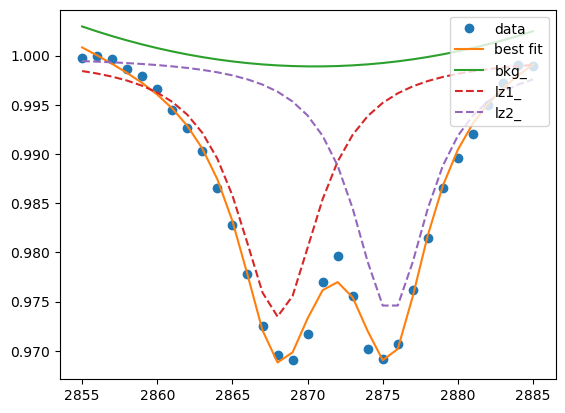

D:2871.7708583315853 MHz
E:3.7280923330606583 MHz


In [5]:
def add_peak(prefix, center, amplitude=6, sigma=3):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (2868, 2879)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

# print(result.fit_report(min_correl=0.5))

plt.plot(xdat, ydat,'o', label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    if name == 'bkg_':
        plt.plot(xdat,comps['bkg_'], label='bkg_')
    else:
        plt.plot(xdat, comp + 1, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# Acceder a los centros de lz1 y lz2
nu_menos = result.params['lz1_center'].value
nu_mas = result.params['lz2_center'].value

D = (nu_mas + nu_menos)/2 
E = (nu_mas - nu_menos)/2
print(f'D:{D} MHz')
print(f'E:{E} MHz')

# Cargando la data obtenida del experimento ODMR con campo

C:\Users\JAAL_\AppData\Local\Temp\ipykernel_21832\2240169024.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ndim1 = np.array(imread(file[0][0])).shape[0] # dimensión de la matriz total
C:\Users\JAAL_\AppData\Local\Temp\ipykernel_21832\2240169024.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ndim2 = np.array(imread(file[0][0])).shape[1] # dimensión de la matriz total
C:\Users\JAAL_\AppData\Local\Temp\ipykernel_21832\2240169024.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavio

( # experimento_i, frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)


(64, 541, 3, 2, 20, 20)

( frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)


(541, 3, 2, 20, 20)

( frecuencia_j, submatriz_k, submatriz_l)


(541, 3, 2)

(frecuencia, submatriz_k, submatriz_l)


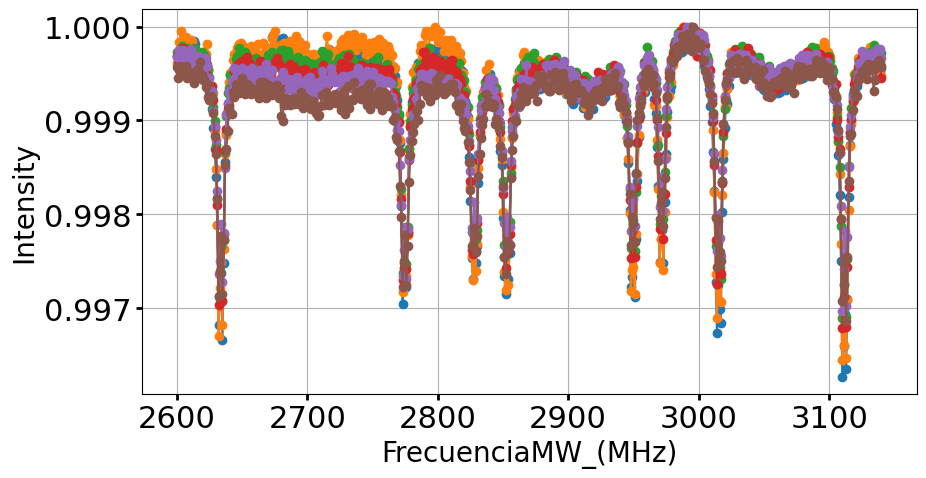

In [6]:
''' ########### Datos de imagenes a array con las submatrices ##############   ''' 

os.chdir('C:/Users/JAAL_/Documents/ODMR-jupyter-calculo-magnetometria/Datos-para-magnetometria/CorteTOTAL/')
# ahora si se ubica en la carpeta una

########################## LECTURA ################################

# numero de medias 
nmedias = 64
file = list()
for i in range(1,nmedias+1):
    # devuelve la ruta especificada de datos
    file.append(glob.glob(str(i)+'_image_*.png'))

######################## FRECUENCIAS ###############################
    
my_range=np.arange(2870-270,2870+271,1)
f1 = [x for x in my_range] # El rango de frecuencias de las fotos en una lista

####################### Preparamos el array ODMR1 ##########################
'''
i = En el for indica el numero de experimento 
j = Indica el numero de frecuencia en la foto
'''

ODMR = [] # La lista supergrande  
ndim1 = np.array(imread(file[0][0])).shape[0] # dimensión de la matriz total
ndim2 = np.array(imread(file[0][0])).shape[1] # dimensión de la matriz total
m = 20 # m es la subdivisión de matrices cuadradas
for i in range(nmedias):
    n = []
    for j in range(len(f1)):
        imag = np.array(imread(file[i][j]))
        
        # Convertimos la matriz en submatrices 
        submatriz_imag = dividir_matriz_en_submatrices(imag, m)
        n.append(submatriz_imag)
        
    ODMR.append(np.array(n)) # Es importante que ''n'' lo transformemos en array

ODMR1 = np.array(ODMR) # Es importante transformarlo a array

print("( # experimento_i, frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)")
display(ODMR1.shape)

'''
#########3 Sumar en indices para evidenciar las contrastar las variaciones del ODMR #####################

- Se suma todos los experimentos, para eso el array ODMR1 se suma un primer indice
- Suerte tengo que con array es una tarea sencilla porque los indices son ejes en un array y se puede sumar en numpy es con np.sum() 
- Con el resultado final ya no es necesario hacer más calculo, solo escoge la submatriz y a trabajar sobre lo que necesitas
'''

# Sumar en eje 0
ODMR2 = np.sum(ODMR1, axis=0)
print("( frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)")
display(ODMR2.shape)

# Sumar 2 ejes 
print("( frecuencia_j, submatriz_k, submatriz_l)")
ODMR3 = np.sum(ODMR2, axis=(3,4))
display(ODMR3.shape)

print("(frecuencia, submatriz_k, submatriz_l)")


'''
################ Escogiendo la submatriz de trabajo #########################
'''

plt.figure(figsize = (10,5))

for k in range(0,int(ndim1/m)):
    for l in range(0,int(ndim2/m)):
        ODMR_ROI = ODMR3[:,k,l]/np.amax(ODMR3[:,k,l]) # normalizamos
        ODMR_ROI
        plt.plot(f1,ODMR_ROI,'-o',label=f"{k},{l}")
        
plt.tick_params(direction='out', length=4, width=2, colors='black',labelsize=22)       
plt.xlabel('FrecuenciaMW_(MHz)',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
# plt.legend()
plt.grid()
#plt.xlim(2765,2770)
#plt.ylim(0.992,1)
plt.show() 

## Grafico de data particular

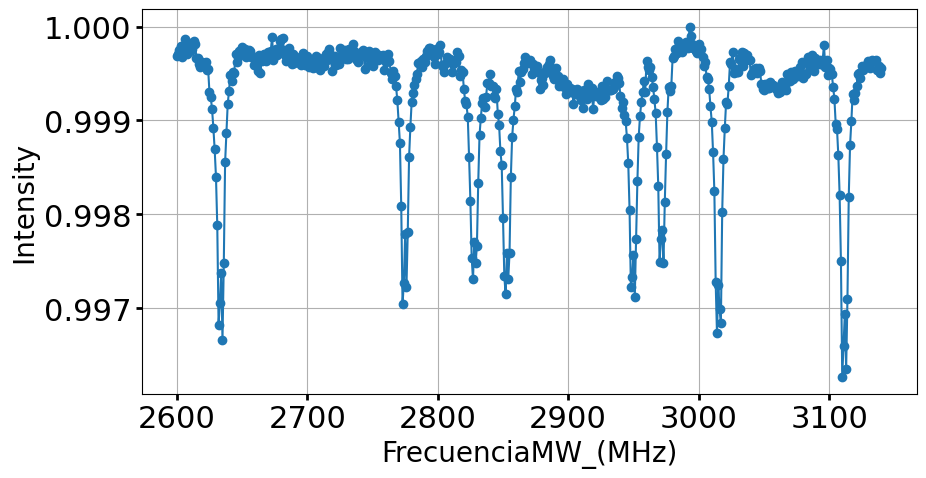

In [7]:
plt.figure(figsize = (10,5))

k,l = 0,0
ODMR_ROI = ODMR3[:,k,l]/np.amax(ODMR3[:,k,l]) # normalizamos
plt.plot(f1,ODMR_ROI,'-o',label=f"{k},{l}")
        
plt.tick_params(direction='out', length=4, width=2, colors='black',labelsize=22)       
plt.xlabel('FrecuenciaMW_(MHz)',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
# plt.legend()
plt.grid()
#plt.xlim(2765,2770)
#plt.ylim(0.992,1)
plt.show() 

# ODMR con campo (maximo 8 valles)

In [8]:
# import matplotlib.pyplot as plt
import numpy as np
# para crear modelos y ajustar datos. LorentzianModel y QuadraticModel son dos tipos 
# de modelos que se utilizan para ajustar los datos.
from lmfit.models import LorentzianModel, QuadraticModel 

# Escoger la data particular
k,l = 1,1
dataODMR = ODMR3[:,k,l]/np.amax(ODMR3[:,k,l]) # normalizamos
xdat = np.array(f1)
ydat = np.array(dataODMR) # Para convertir los picos en valle

## Fitting del ODMR y encontrando las frecuencias de resonancia

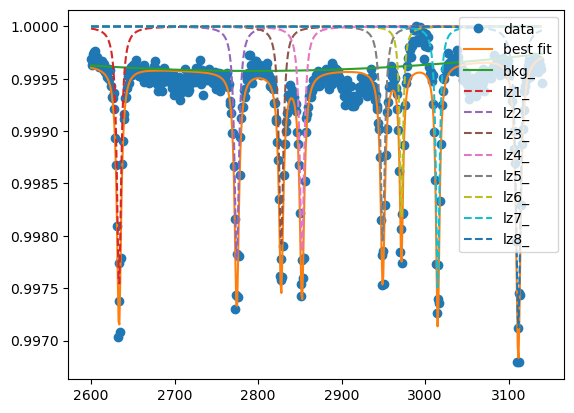

Los minimos son [2633.55162669 2774.50497515 2827.68590044 2852.61978306 2949.32580559
 2971.75675592 3015.23598053 3111.70378401]


In [10]:
def add_peak(prefix, center, amplitude=6, sigma=3):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (2635, 2773, 2827, 2852, 2951, 2973, 3014, 3113)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

# print(result.fit_report(min_correl=0.5))

plt.plot(xdat, ydat,'o', label='data')
plt.plot(xdat, result.best_fit, label='best fit')

for name, comp in comps.items():
    if name == 'bkg_':
        plt.plot(xdat,comps['bkg_'], label='bkg_')
    else:
        plt.plot(xdat, comp + 1, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# Acceder a los centros de lz1 y lz2
min1 = result.params['lz1_center'].value
min2 = result.params['lz2_center'].value
min3 = result.params['lz3_center'].value
min4 = result.params['lz4_center'].value
min5 = result.params['lz5_center'].value
min6 = result.params['lz6_center'].value
min7 = result.params['lz7_center'].value
min8 = result.params['lz8_center'].value
frecmin = np.array([min1,min2,min3,min4,min5,min6,min7,min8])

print(f"Los minimos son {frecmin}")

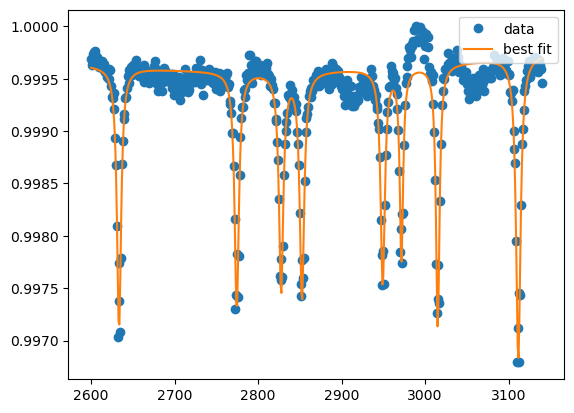

In [11]:
plt.plot(xdat, ydat,'o', label='data')
plt.plot(xdat, result.best_fit, label='best fit')
plt.legend(loc='upper right')
plt.show()

## Calculo del campo magnetico de las frecuencias de transición $f_{0,i}$

In [12]:
h = 6.626*10**(-34)
ge = 2.0023
mu_B  = 9.27 * 10**(-24)

hgemuB = h/(ge*mu_B)
display(frecmin)

array([2633.55162669, 2774.50497515, 2827.68590044, 2852.61978306,
       2949.32580559, 2971.75675592, 3015.23598053, 3111.70378401])

In [35]:
### Sistemas de referencia
baseB = np.eye(3)
baseB_ = 1/np.sqrt(3)*np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1],[1,1,1]])

### Matriz cambio de base
MBB_ = 1/np.sqrt(3)*np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])
MB_B = np.sqrt(3)/2*np.array([[0,-1,-1],[-1,0,-1],[-1,-1,0]])

## Hallando el modulo de campo magnetico
B = []
for i in range(1,5):
    # El 10**(6) es para hacer cuentas de MHz
    Bvalor = hgemuB*10**(6)*( 1/3*(frecmin[i-1]**2 + frecmin[-i]**2 - frecmin[i-1]*frecmin[-i] - D**2) - E**2 )**(1/2)
    B.append(Bvalor)
    
print("---------Modulo de campo magnetico ----------------")
display(B)

Bcalc = np.array(B).mean()

print(f'B:{Bcalc*10**3} mT')


#################################################################################3
## Hallando los coseno de theta
costhetalist = []
for i in range(1,5):
    # El 10**(6) es para hacer cuentas de MHz
    cos2theta = ( 7*D**3 + 2*(frecmin[i-1] + frecmin[-i])*(2*(frecmin[i-1]**2 + frecmin[-i]**2) - 5*frecmin[i-1]*frecmin[-i]) - 3*D*(frecmin[i-1]**2 + frecmin[-i]**2 - frecmin[i-1]*frecmin[-i] + 9*E**2)   ) \
                    / ( 9*D*(frecmin[i-1]**2 + frecmin[-i]**2 - frecmin[i-1]*frecmin[-i] -D**2-3*E**2)  )
    
    
    costheta = np.cos(np.arccos(cos2theta)/2)
    costhetalist.append(costheta)

print("------------Los cosenos de thetas--------------")
display( np.array(costhetalist) )


######################################################################################33
# Definir la matriz de coeficientes A (4 ecuaciones y 3 incógnitas)
A = np.array([[baseB_[0] @ baseB_[0].T, baseB_[0] @ baseB_[1].T, baseB_[0] @ baseB_[2].T],
            [baseB_[1] @ baseB_[0].T, baseB_[1] @ baseB_[1].T, baseB_[1] @ baseB_[2].T],
            [baseB_[2] @ baseB_[0].T, baseB_[2] @ baseB_[1].T, baseB_[2] @ baseB_[2].T],
            [baseB_[3] @ baseB_[0].T, baseB_[3]@ baseB_[1].T, baseB_[3] @ baseB_[2].T]])

# Definir el vector de términos independientes b
b = np.array([Bcalc*costhetalist[0], Bcalc*costhetalist[1], Bcalc*costhetalist[2],Bcalc*costhetalist[3]])

# Resolver el sistema usando mínimos cuadrados
solution, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

# Imprimir la solución
print("----------- La solución del sistema de ecuaciones es: ---------------")
print("B'x =", solution[0])
print("B'y =", solution[1])
print("B'z =", solution[2])

Bx_ = solution[0]
By_ = solution[1]
Bz_ = solution[2]

BsistemaNV = np.array([[Bx_, By_, Bz_]])
BsistemaNV

Blab = ( MBB_ @ BsistemaNV.T ).T
display(Blab*10**3) # En mT se obtiene multiplicando x 10^3

print("----Modulo de campo magnetico----")
Bcalc2 = (Blab @ Blab.T)[0,0]**(1/2)
print(f'B:{Bcalc2*10**3} mT')

---------Modulo de campo magnetico ----------------


[0.00865511254284103,
 0.008661897400088138,
 0.008667104951999445,
 0.008635339469805001]

B:8.654863591183403 mT
------------Los cosenos de thetas--------------


array([0.98604341, 0.49612862, 0.29475922, 0.19585285])

----------- La solución del sistema de ecuaciones es: ---------------
B'x = 0.005129243620433617
B'y = 0.0019491343395269067
B'z = 0.0006420158612629807


array([[ 1.46536892, -2.20670498, -3.71603539]])

----Modulo de campo magnetico----
B:4.563526263566905 mT
